# Normalizing Features with Graph Convolutional Networks

In [1]:
# download Cora dataset
try:
    from torch_geometric.datasets import Planetoid
except:
    !pip install -q torch-geometric
    from torch_geometric.datasets import Planetoid

# download Cora
dataset = Planetoid(root='.', name='Cora')
data = dataset[0]

Text(0, 0.5, 'number of nodes')

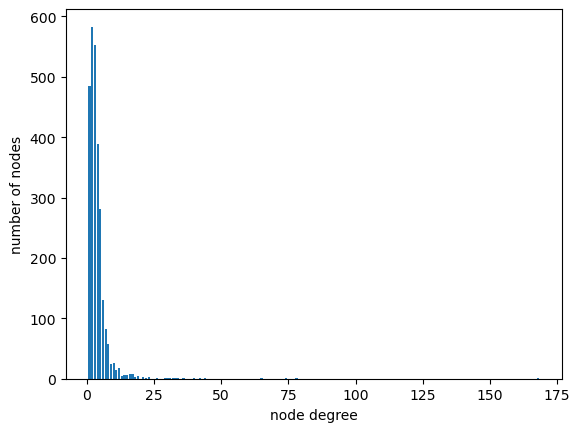

In [2]:
# examine Cora properties
from torch_geometric.utils import degree
from collections import Counter
import matplotlib.pyplot as plt

# get node degrees
degrees = degree(data.edge_index[0]).numpy()

# count node and degree
numbers = Counter(degrees)

# plot node degree 
plt.bar(numbers.keys(), numbers.values())
plt.xlabel("node degree")
plt.ylabel("number of nodes")

In [3]:
import torch
from torch import nn
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(in_channels=dim_in, out_channels=dim_h)
        self.gcn2 = GCNConv(in_channels=dim_h, out_channels=dim_out)
    def forward(self, x: torch.Tensor, edge_index):
        # h = self.gcn1(x, edge_index)
        # h = torch.relu(h)
        # h = self.gcn2(h, edge_index)
        # return nn.functional.log_softmax(h, dim=1)

        return nn.functional.log_softmax(self.gcn2(torch.relu(self.gcn1(x, edge_index)), edge_index), dim=1)
        

In [4]:
# create a GCN model
model = GCN(dim_in=dataset.num_features, dim_h=16, dim_out=dataset.num_classes)
model

GCN(
  (gcn1): GCNConv(1433, 16)
  (gcn2): GCNConv(16, 7)
)

In [5]:
# setup loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-2, weight_decay=5e-4)

In [6]:
# training
from sources import engine

results = engine.train(
    model=model,
    loss_fn=loss_fn,
    optimizer=optimizer,
    data=data,
    adjacency=data.edge_index,
    epochs=300
)

  0%|          | 0/300 [00:00<?, ?it/s]

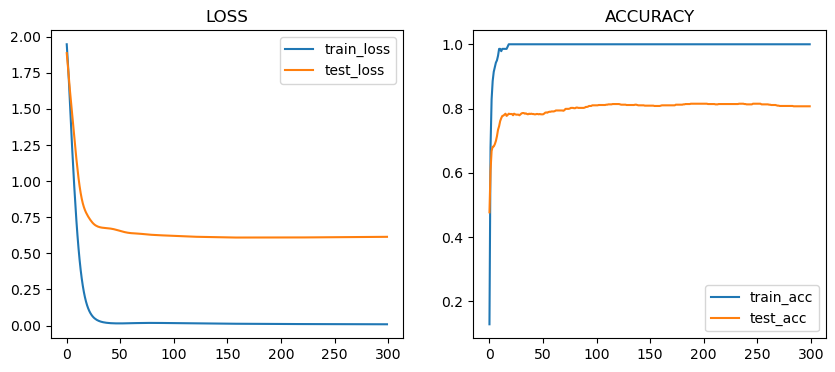

In [7]:
from sources import utils
utils.visualize_results(results=results)